In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Описание данных
* order_id - id заказа
* delivery_time - время доставки в минутах
* district - район доставки
* experiment_group - экспериментальная группа

#### Задание 1

Для начала давайте сформулируем гипотезы для проверки. Выберите статистические гипотезы, которые мы сможем проверить в этом эксперименте:

* Нулевая гипотеза (H0): Разница между средним временем доставки в тестовой и контрольной группе есть
* **Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть**
* Альтернативная гипотеза (H1): Разницы между средним временем доставки в тестовой и контрольной нет
* **Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет**
* Нулевая гипотеза (H0): Изменение алгоритма не влияет на скорость доставки

In [3]:
df = pd.read_csv('experiment_lesson_4.csv')

In [4]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


#### Задание 2

Сопоставьте графики распределения и  экспериментальные группы:

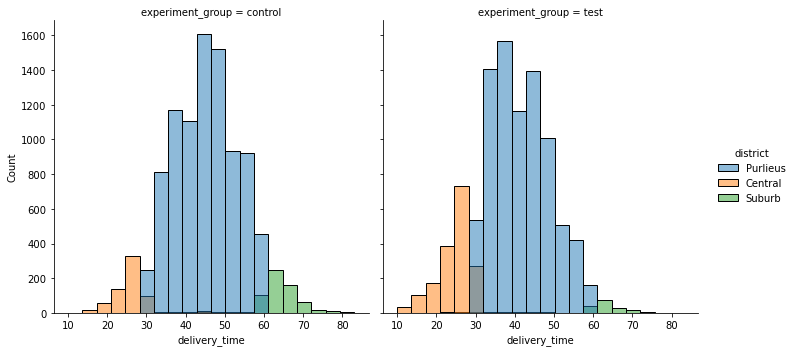

In [12]:
sns.displot(data=df, x='delivery_time', hue='district', bins=20, col='experiment_group')

#### Задание 3

Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [15]:
df.experiment_group.value_counts().diff().abs()

test        NaN
control    12.0
Name: experiment_group, dtype: float64

#### Задание 4
Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

Обязательно сделайте семплирование перед применением критерия при проверке на нормальность (и для теста, и для контроля), так как на больших выборках вы можете получать неверные результаты: 
<pre>
<code>
experiment[experiment['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)
</code>
</pre>
Почему тест может дать здесь неправильный ответ? Загляните в подсказки - в первом пункте мы постарались осветить этот момент подробнее :)


In [26]:
df_test = df.query('experiment_group == "test"')
df_control = df.query('experiment_group == "control"')

df_test_sample = df_test.sample(1000, random_state=17)
df_control_sample = df_control.sample(1000, random_state=17)

c:\Users\psyrnev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

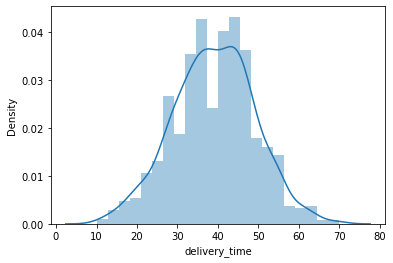

In [27]:
sns.distplot(df_test_sample.delivery_time)

In [28]:
def print_shapiro(x):
    pvalue = st.shapiro(x).pvalue

    msg = 'нормальное'
    if pvalue < 0.05:
        msg ='НЕ нормальное'

    print(f'''
    p-value {pvalue}
    Здесь мы как раз хотим получить р-уровень значимости больше 0.05, поскольку если он меньше, то новость плохая

    распределение {msg}
    ''')

    return pvalue

In [29]:
print_shapiro(df_test_sample.delivery_time)


    p-value 0.14005419611930847
    Здесь мы как раз хотим получить р-уровень значимости больше 0.05, поскольку если он меньше, то новость плохая

    распределение нормальное
    


0.14005419611930847

In [30]:
print_shapiro(df_control_sample.delivery_time)


    p-value 0.12411931157112122
    Здесь мы как раз хотим получить р-уровень значимости больше 0.05, поскольку если он меньше, то новость плохая

    распределение нормальное
    


0.12411931157112122

In [31]:
std_test = df_test.delivery_time.std()
print(f' стандартное выборочное отклание в тесте {round(std_test, 2)}')

std_control = df_control.delivery_time.std()
print(f' стандартное выборочное отклание в контроле {round(std_control, 2)}')

 стандартное выборочное отклание в тесте 9.88
 стандартное выборочное отклание в контроле 9.99


Ответ:
* Для того, чтобы проверить нормальность распределения, я использую **SHAPIRO-WILK TEST**
* Этот тест показывает, что значения в тестовой группе распределены **НОРМАЛЬНО**
* В контрольной группе распределение является **НОРМАЛЬНЫМ**
* Стандартное отклонение времени доставки в тесте равно (округлите до сотых) **9.88**
* Стандартное отклонение времени доставки в контроле равно (округлите до сотых) **9.99**

#### Задание 5
Пришло время сравнить средние в тесте и контроле.

In [33]:
st.ttest_ind(df_test.delivery_time, df_control.delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

Ответ:
* Для сравнения средних в данных экспериментальных группах я использую **STUDENT'S T-TEST**
* Статистика в тесте равна (округлите до целого) **-43**, p-value **<= 0.05**
.

#### Задание 6

На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 

Знак изменения необходимо учесть!

In [35]:
X_test = df_test.delivery_time.mean()

X_control = df_control.delivery_time.mean()

X_diff = (X_test - X_control) / X_control 

print(f'''
среднее в тестовой группе: {round(X_test,2)}
среднее в контрольной группе: {round(X_control, 2)}

изменение среднего в тестовой группе составило: {round(X_diff * 100, 2)}%
''')


среднее в тестовой группе: 39.05
среднее в контрольной группе: 45.07

изменение среднего в тестовой группе составило: -13.35%



#### Задание 7

Раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.